# **Traffic Sign AI**

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
# Imports
%load_ext tensorboard
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import itertools

In [3]:
# Metadaten für das Programm 
data = []
labels = []
height = 30
width = 30
channels = 3
classes = 43
input_size = height * width * channels

In [4]:
# Verkehrsschilder 
sign_label = ["20 km/h","30 km/h","50 km/h","60 km/h","70 km/h","80 km/h","80 km/h Aufhebung","100 km/h",
          "120 km/h", "Überholverbot", "LKW-Überholverbot", "Vorfahrt", "Vorfahrtsstraße","Vorfahrt gewähren", 
          "Stop","Fahrverbot","Verbot für Lastwagen","Einfahrt verboten","Gefahr","Linkskurve","Rechtskurve","Doppelkurve",
          "Bodenwelle","Schleudergefahr","Verengung","Baustelle","Ampel","Zebrastreifen","Kinder","Fahrradweg","Schneegefahr",
          "Wildwechsel","Unbegrenzte Geschwindigkeit","Rechtsabbiegen", "Linksabbiegen", "Geradeaus fahren", "Geradeaus oder Rechtsabbiegen",
          "Geradeaus oder Linksabbiegen", "Hindernis rechts umfahren", " Hindernis links umfahren", "Kreisverkehr", "Ende des Überholverbotes",
          "Ende des LKW-Überholverbotes"]

In [5]:
# Einlesen der Bild-Datein
for i in range(classes):
    path = r".\Train\{0}/".format(i)
    print(path)
    Class = os.listdir(path)
    for a in Class:
        try:
            image = cv2.imread(path + a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")

.\Train\0/
.\Train\1/
.\Train\2/
.\Train\3/
.\Train\4/
.\Train\5/
.\Train\6/
.\Train\7/
.\Train\8/
.\Train\9/
.\Train\10/
.\Train\11/
.\Train\12/
.\Train\13/
.\Train\14/
.\Train\15/
.\Train\16/
.\Train\17/
.\Train\18/
.\Train\19/
.\Train\20/
.\Train\21/
.\Train\22/
.\Train\23/
.\Train\24/
.\Train\25/
.\Train\26/
.\Train\27/
.\Train\28/
.\Train\29/
.\Train\30/
.\Train\31/
.\Train\32/
.\Train\33/
.\Train\34/
.\Train\35/
.\Train\36/
.\Train\37/
.\Train\38/
.\Train\39/
.\Train\40/
.\Train\41/
.\Train\42/


Gesamtzahl der Bilder: 39209


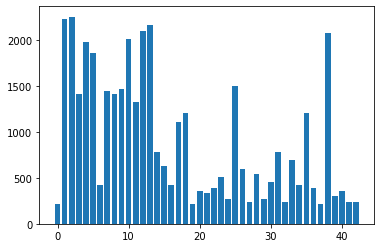

In [6]:
# Zusammenfassen aller Bilder in einem Array
Cells = np.array(data)
labels = np.array(labels)
print("Gesamtzahl der Bilder:",len(Cells))

# Darstellen der Bias des Datensets
from collections import Counter
c = Counter(labels)
plt.bar(c.keys(), c.values())
plt.show()

In [7]:
# Vermischen der Daten und Labels
s = np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells = Cells[s]
labels = labels[s]

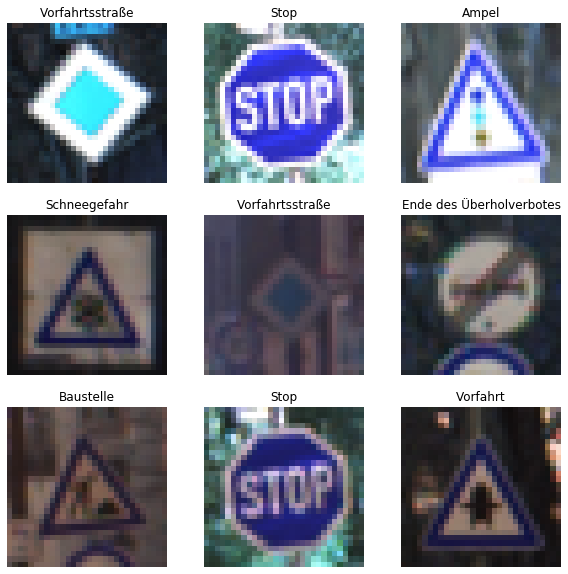

In [8]:
# Beispiele aus dem Dataset
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Cells[i])
    plt.title(sign_label[labels[i]])
    plt.axis("off")
plt.show()

In [9]:
# Aufteilen der Daten in ein Trainings- und ein Validierungsset
(x_train,x_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

print("Größe des Trainingsets:    ",len(x_train))
print("Größe des Validierungssets:",len(x_val))

Größe des Trainingsets:     31368
Größe des Validierungssets: 7841


In [10]:
# Die Labels mit einem One-Hot-Encoder kategorisieren
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [11]:
# Aufstellen des Netztes und Trainieren des Netztes

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import datetime, os

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Kompilieren des Models 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

epochs = 20
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=epochs,
          validation_data=(x_val, y_val), 
          callbacks = tensorboard_callback)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [12]:

img = np.reshape(x_train[0:10], (10, height, width, 3))
file_writer = tf.summary.create_file_writer(logdir)
with file_writer.as_default():
      tf.summary.image("Training data", img, step=0)

In [13]:
# Starten des Tensorboards
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12440), started 21:26:05 ago. (Use '!kill 12440' to kill it.)

In [14]:
# Laden der Test-Daten 
y_test=pd.read_csv(r'.\Test.csv')
names =y_test['Path'].to_numpy()
y_test =y_test['ClassId'].values
data=[]

In [15]:
from tqdm import tqdm
for f in tqdm(names):
    image=cv2.imread(r'.\Test/'+f.replace('Test', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

100%|██████████| 12630/12630 [00:25<00:00, 496.66it/s]


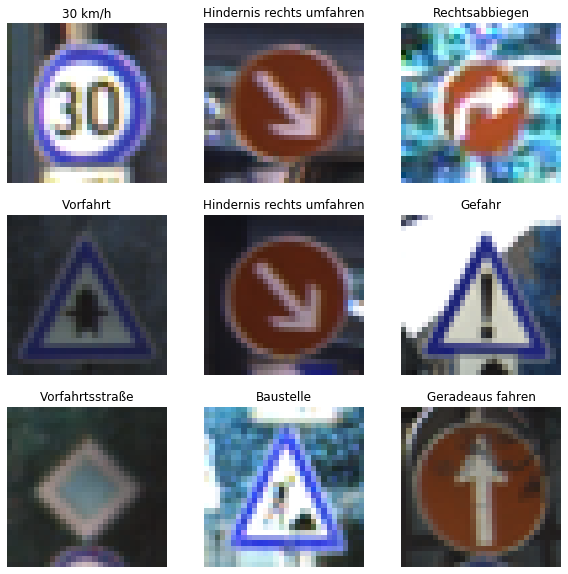

In [16]:
# Beispiele aus dem Test Dataset
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(data[i])
    plt.title(sign_label[y_test[i]])
    plt.axis("off")
plt.show()

In [17]:
x_test=np.array(data)
x_test = x_test.astype('float32')/255
pred = model.predict(x_test)

In [18]:
meta_data=[]
for f in range(42):
    image=cv2.imread("./Meta/"+str(f)+".png")
    image_from_array = Image.fromarray(image, 'RGB')
    meta_data.append(np.array(image_from_array))    

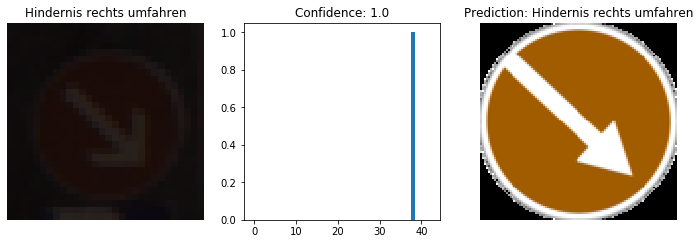

In [19]:
x = 1320

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (12, 12))

y = [i for i in range(len(sign_label))]

ax1.imshow(data[x])
ax2.bar(y, pred[x])
ax3.imshow(meta_data[np.argmax(pred[x])])

asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

ax1.axis("off")
ax3.axis("off")

ax1.title.set_text(sign_label[y_test[x]])
ax2.title.set_text("Confidence: "+ str(max(pred[x])))
ax3.title.set_text("Prediction: "+sign_label[np.argmax(pred[x])])
plt.show()

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [21]:
predictions = []
for i in pred:
    predictions.append(i.argmax())

cm = confusion_matrix(y_test, predictions)

In [22]:
df_cm = pd.DataFrame(cm, index = [i for i in sign_label],
                          columns = [i for i in sign_label])

df_perc = pd.DataFrame()
for i in sign_label:
    row = (df_cm[i] / df_cm[i].sum()) * 100
    df_perc = pd.concat([df_perc, row],axis=1)

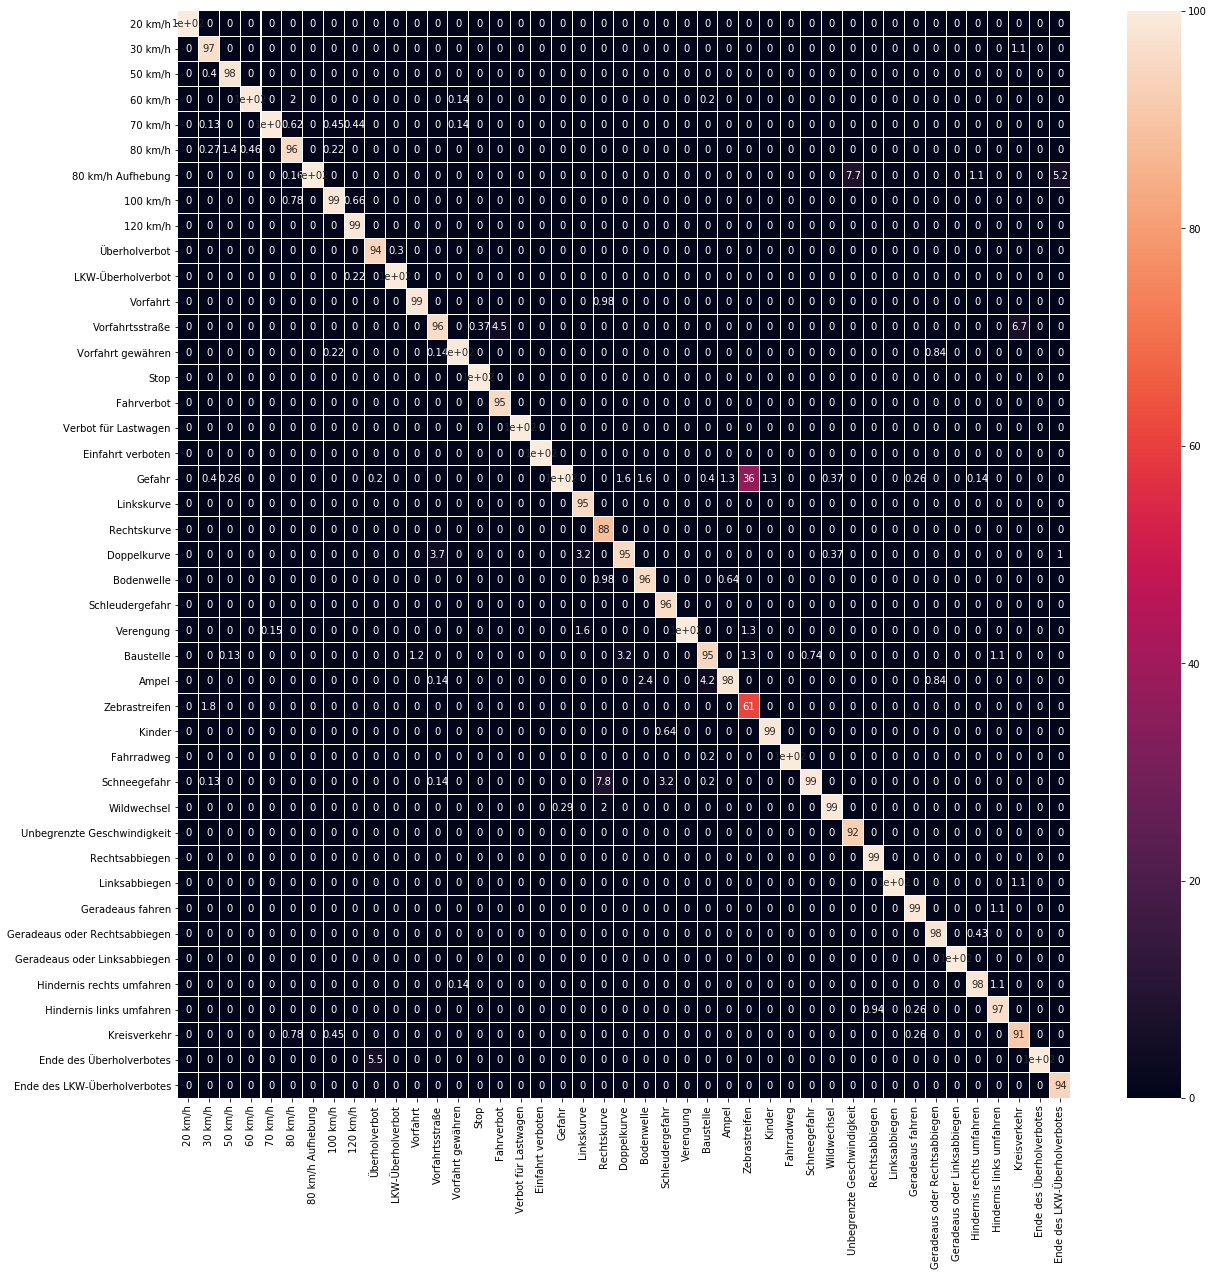

In [23]:
df_perc.round(0)
plt.figure(figsize = (20,20))
svm = sn.heatmap(df_perc, annot=True,vmin=0, vmax=100, linewidths=0.01)
figure = svm.get_figure() 
figure.savefig('cm_original_percentage.png', dpi=400)